<a href="https://colab.research.google.com/github/DaJaCruz/PhD/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# Basic plotting tools needed in Python.

import matplotlib.pyplot as plt # import plotting tools to create figures
import numpy as np # import numpy to handle a lot of things!
from IPython.display import display, Math # to print with Latex math
import pandas as pd # Pandas dataframe (very common in ML)

# Uncomment line below if you want to enable live rotation of the surface plots.
#%matplotlib notebook
#
from matplotlib import cm # to change colors of surface plots
# Set the color scheme used in every plot:
#set_cm = cm.inferno # viridis, inferno, copper, PuBu, cool, coolwarm, hsv
#
seed = 1987 # set a random seed to replicate results
np.random.seed(seed)

#%config InlineBackend.figure_format = "retina" # render higher resolution images in the notebook
#plt.style.use("seaborn") # style for plotting that comes from seaborn
FS = 26  # Font Size
plt.rcParams['axes.facecolor'] = (0.97, 0.97, 0.97)
plt.rcParams['figure.facecolor'] = (1, 1, 1)
plt.rcParams["font.family"] = "sans"
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams['font.size'] = FS
params = {"ytick.color": (0, 0, 0),
          "xtick.color": (0, 0, 0),
          "grid.color": (.9, .9, .9),
          "text.color": (0, 0, 0),
          "axes.labelcolor": (0, 0, 0),
          "axes.edgecolor": (.15, .15, .15)
          }
plt.rcParams.update(params)
linewidth=3.0

In [21]:
url = 'https://raw.githubusercontent.com/DaJaCruz/PhD/main/3PointBendingData.csv?token=GHSAT0AAAAAACAAJYJJGLAPIS26AHMZ5BL6ZARSVNQ'
df = pd.read_csv(url, delimiter=';')


In [22]:
from sklearn.model_selection import train_test_split

X_data = df.loc[:,['Input_1','Input_2','Input_3','Input_4','Input_5','Input_6','Input_7',]].values # uniformly spaced points
Y_data = df.loc[:,['Output_1','Output_2']].values # function values at x_data

# Recreate the grid of points that is necessary to plot surfaces (by reshaping)
#X1_grid = np.reshape(X_data[:,0],( round( np.sqrt(len(X_data)) ), round( np.sqrt(len(X_data)) ) ))
#X2_grid = np.reshape(X_data[:,1],( round( np.sqrt(len(X_data)) ), round( np.sqrt(len(X_data)) ) ))
#Y_grid = np.reshape(y_data,( round( np.sqrt(len(X_data)) ), round( np.sqrt(len(X_data)) ) ))

# Train/test split like we did before!
from sklearn.model_selection import train_test_split

#testset_ratio = 0.4 # ratio of test set points from the dataset

#X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data,
#                                                    test_size=testset_ratio#,random_state=seed
#                                                    )

X_test = X_data[0:36,:]
X_train = X_data[36:91,:]

Y_test = Y_data[0:36,:]
Y_train = Y_data[36:91,:]

In [23]:
from sklearn.preprocessing import MinMaxScaler
#
#Scale Inputs with a [-1,1] scaler
scaler_x = MinMaxScaler(feature_range=(-1,1))
scaler_x.fit(X_train)# fit the scaler to the input data
#
X_train_scaled=scaler_x.transform(X_train) # scale the input training data
X_test_scaled=scaler_x.transform(X_test)  # scale the input testing data
X_data_scaled=scaler_x.transform(X_data) # scale the input data (the whole dataset)
#
#Scale Inputs with a [-1,1] scaler
scaler_y = MinMaxScaler(feature_range=(-1,1))
scaler_y.fit(Y_train) # fit the scaler to the output data
#
Y_train_scaled=scaler_y.transform(Y_train) # scale the output training data
Y_test_scaled=scaler_y.transform(Y_test)  # scale the output testing data
Y_data_scaled=scaler_y.transform(Y_data) # scale the output data (the whole dataset)


In [24]:
plot(Y_train_scaled[:,1], Y_train_scaled[:,0], 'o', markersize=10, color='gray', label="training points") # show training data
plot(Y_test_scaled[:,1], Y_test_scaled[:,0], 'o', markersize=10, color='black', label="testing points") # show training data
#ax_ANN.set_ylabel('$K$')
#ax_ANN.set_xlabel('$n$')
#ax_ANN.legend(loc='best')
#ax_ANN.set_xlim([0, 0.4])
#ax_ANN.set_ylim([200, 1800])
#ax2_ANN.grid(True, color='gray', linestyle='-')
# Create figure with specified size
#fig_ANN.set_size_inches(22, 8)


NameError: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling inputs with a Standard Scaler:
scaler_x = StandardScaler()
scaler_x.fit(X_train) # fit the scaler to the input data
#
X_train_scaled=scaler_x.transform(X_train) # scale the input training data
X_test_scaled=scaler_x.transform(X_test)  # scale the input testing data
X_data_scaled=scaler_x.transform(X_data) # scale the input data (the whole dataset)

# Scaling outputs with a Standard Scaler:
scaler_y = StandardScaler()
scaler_y.fit(Y_train) # fit the scaler to the output data
#
Y_train_scaled=scaler_y.transform(Y_train) # scale the output training data
Y_test_scaled=scaler_y.transform(Y_test)  # scale the output testing data
Y_data_scaled=scaler_y.transform(Y_data) # scale the output data (the whole dataset)

In [11]:
# As expected, the code for multidimensional ANNs is basically the same as the 1D case.
from tensorflow import keras
from tensorflow.keras.optimizers import Adam # import the optimizer you want to use to calculate the parameters
from keras.models import Sequential # to create a feedforward neural network
from keras.layers.core import Dense # to create a feedforward neural network with dense layers
from keras.wrappers.scikit_learn import KerasRegressor # a new version will use scikeras
from keras.callbacks import EarlyStopping # a strategy for complexity control
from sklearn.model_selection import GridSearchCV # simple (brute force) approach to find better hyperparameters.
#
# Function to create the ANN model
def create_ANN(input_dimensions=1,neurons1=10,neurons2=10,neurons3=10,neurons4=10,neurons5=10,
                 activation='relu',optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(neurons1, input_dim=input_dimensions, activation=activation)) # first hidden layer
    model.add(Dense(neurons2, activation=activation)) # second hidden layer
    model.add(Dense(neurons3, activation=activation)) # UNCOMMEND If you want a third hidden layer
    model.add(Dense(neurons4, activation=activation)) # UNCOMMENT if you want a fourth hidden layer, etc.
    model.add(Dense(neurons5, activation=activation)) # UNCOMMENT if you want a fourth hidden layer, etc.
    model.add(Dense(2)) # output layer with just 2 neuronS
    model.compile(loss='mse', optimizer=optimizer) # choose error metric and optimizer.
    return model

In [ ]:
# If you don't want to use Early Stopping, then comment the command below.
early_stopping = EarlyStopping(monitor='val_loss', # use validation error to check if training should stop early
                               min_delta=0.0001, # minimum change in the monitored quantity to qualify as an
                                              # improvement (if 0, then even small improvements count)
                               patience=100, # be patient for a few epochs to verify evolution of loss
                               mode='min'
                               ) # in min mode, training stops when val_loss stops decreasing
# Summary of this early_stopping criterion:
# stop training when there is no improvement in the loss for 30 consecutive epochs.

neurons1=5 # number of neurons in hidden layer 1
neurons2=5 # number of neurons in hidden layer 2
neurons3=5 # number of neurons in hidden layer 3
neurons4=5 # number of neurons in hidden layer 4
neurons5=5 # number of neurons in hidden layer 5
epochs = 1000 # number of epochs
batch_size = len(X_train) # number of samples in each batch
optimizer = Adam(learning_rate=0.01) # specifying the learning rate value for the optimizer (PLAY WITH THIS!)
ANN_model = KerasRegressor(build_fn=create_ANN, # the function where we define our ANN
                           input_dimensions=np.shape(X_train)[1], # the input dimensions (here it is 2)
                           neurons1=neurons1, # number of neurons in the first hidden layer
                           neurons2=neurons2, # number of neurons in the second hidden layer
                           neurons3=neurons3, # number of neurons in the third hidden layer
                           neurons4=neurons4, # number of neurons in the fourth hidden layer
                           neurons5=neurons5, # number of neurons in the fifth hidden layer
                           batch_size=batch_size, # define the number of samples in each batch
                           epochs=epochs, # number of epochs
                           optimizer=optimizer, # optimizer
                           callbacks=[early_stopping], # include early stopping
                           validation_data=(X_test_scaled, Y_test_scaled)) # validation data to compute loss
# Train the model:
history = ANN_model.fit(X_train_scaled, Y_train_scaled)

In [13]:
Y_data_ANNpred_scaled = history.model.predict(X_data_scaled)
Y_data_ANNpred = scaler_y.inverse_transform(Y_data_ANNpred_scaled)

3/3 [==============================] - 0s 7ms/step


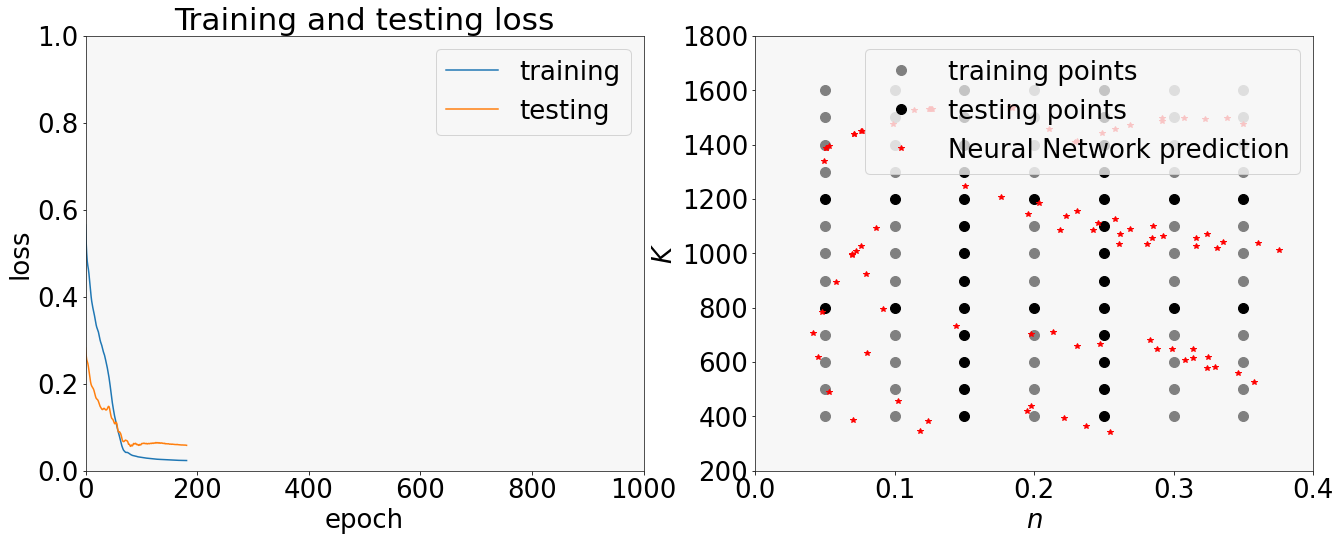

In [14]:
fig_ANN, (ax1_ANN, ax2_ANN) = plt.subplots(1,2)

ax1_ANN.plot(history.history['loss'])
ax1_ANN.plot(history.history['val_loss'])
ax1_ANN.set_title('Training and testing loss')
ax1_ANN.set_ylabel('loss')
ax1_ANN.set_xlabel('epoch')
ax1_ANN.legend(['training', 'testing'], loc='upper right')
#ax1_ANN.grid(True, color='gray', linestyle='-')
ax1_ANN.set_xlim([0, 1000])
ax1_ANN.set_ylim([0, 1])

ax2_ANN.plot(Y_train[:,1], Y_train[:,0], 'o', markersize=10, color='gray', label="training points") # show training data
ax2_ANN.plot(Y_test[:,1], Y_test[:,0], 'o', markersize=10, color='black', label="testing points") # show training data
ax2_ANN.plot(Y_data_ANNpred[:,1], Y_data_ANNpred[:,0], marker='*', linestyle='none', color='red', label="Neural Network prediction") # plot prediction
ax2_ANN.set_ylabel('$K$')
ax2_ANN.set_xlabel('$n$')
ax2_ANN.legend(loc='best')
ax2_ANN.set_xlim([0, 0.4])
ax2_ANN.set_ylim([200, 1800])
#ax2_ANN.grid(True, color='gray', linestyle='-')
# Create figure with specified size
fig_ANN.set_size_inches(22, 8)



In [ ]:
from tensorflow import keras
from tensorflow.keras.optimizers import Adam # import the optimizer you want to use to calculate the parameters
from keras.models import Sequential # to create a feedforward neural network
from keras.layers.core import Dense # to create a feedforward neural network with dense layers
from keras.wrappers.scikit_learn import KerasRegressor # a new version will use scikeras
from keras.callbacks import EarlyStopping # a strategy for complexity control
from sklearn.model_selection import GridSearchCV # simple (brute force) approach to find better hyperparameters.
#
# Function to create the ANN model
def create_ANN(input_dimensions=1,neurons1=10,neurons2=10,#neurons3=10,neurons4=10,neurons5=10,
               activation='relu',optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(neurons1, input_dim=input_dimensions, activation=activation)) # first hidden layer
    model.add(Dense(neurons2, activation=activation)) # second hidden layer
    #model.add(Dense(neurons3, activation=activation)) # thrid hidden layer
    #model.add(Dense(neurons4, activation=activation)) # fourth hidden layer, etc.
    #model.add(Dense(neurons5, activation=activation)) # fourth hidden layer, etc.
    model.add(Dense(2))
    model.compile(loss='mse', optimizer=optimizer)
    return model
#
# Do you want to look for the best parameters for the Neural Network using Grid Search ("brute force")?
gridsearch = 0 # If gridsearch = 1 it can be quite slow!

if gridsearch==1:
    # If you don't want to use Early Stopping, then comment the command below.
    early_stopping = EarlyStopping(monitor='val_loss', # use validation error to check if training should stop early
                                   min_delta=0.0, # minimum change in the monitored quantity to qualify as an
                                                  # improvement (if 0, then even small improvements count)
                                   patience=30, # be patient for a few epochs to verify evolution of loss
                                   mode='min') # in min mode, training stops when val_loss stops decreasing
    # Summary of this early_stopping criterion:
    # stop training when there is no improvement in the loss for 30 consecutive epochs.
    #
    # Define the grid search for hyperparameters. Each veriable is a 1D array whose elements represent a particular
    # choice of value for that hyperparameter. The grid search will then create all possible combinations among
    # the hyperparameters values that are defined below. If you do not want to change the value of a particular
    # hyperparameter you can define a 1D array that only has 1 element.
    neurons1 = [5,20,200] # number of neurons in hidden layer 1
    neurons2 = [5,20] # number of neurons in hidden layer 2 (if present; uncomment in create_ANN function)
    #neurons3 = [5,10] # number of neurons in hidden layer 3 (if present; uncomment in create_ANN function)
    #neurons4 = [5,10] # number of neurons in hidden layer 4 (if present; uncomment in create_ANN function)
    #neurons5 = [5,10]
    batch_size = [len(X_train)] # number of samples in each batch
    epochs = [1000] # each element in the vector contains the number of epochs that each model should use.
    optimizer = ['adam'] # 
#    optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'] # different optimizers
#    init_mode = ['uniform', 'lecun_uniform', 'normal', 'orthogonal', 'zero', 'one', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'] # different weight initialization strategies
    #
    param_grid = dict(batch_size=batch_size, # define the number of samples in each batch
                      epochs=epochs, # total number of epochs
                      neurons1=neurons1, # number of neurons in the first hidden layer
                      neurons2=neurons2, # number of neurons in the second hidden layer
                      #neurons3=neurons3,
                      #neurons4=neurons4,
                      #neurons5=neurons5,# commented out because I am not using them
                      optimizer=optimizer) # optimizer to find the model parameters
    ANN_model = KerasRegressor(build_fn=create_ANN, # the function where we define our ANN
                               input_dimensions=np.shape(X_train)[1]) # the input dimensions (here it is 2)
    grid = GridSearchCV(estimator=ANN_model, # use our ANN regression model
                        param_grid=param_grid, # use a grid of hyperparameters to find the best among the grid.
                        n_jobs=-1, # number of CPUs to use (if n_jobs = -1 then it uses all CPUs)
                        cv=3) # Using cross validation (if cv=3 then uses 3-fold cross validation)
    grid_result = grid.fit(X_train_scaled, Y_train_scaled, # training data
                           callbacks=[early_stopping], # include early stopping
                           validation_data=(X_test_scaled, Y_test_scaled)) # validation data to compute loss
    # Once every model in the Grid of hyperparameters is trained, then pick the best model and fit it to
    # the entire training set (without considering cross validation, as we did in the grid search).
    history = grid_result.best_estimator_.fit(X_train_scaled, Y_train_scaled, 
                                              callbacks=[early_stopping],
                                              validation_data=(X_test_scaled,
                                                               Y_test_scaled))
    # Summarize results
    print("Best: %f using %s" % (grid_result.best_score_,
                                 grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score'] # mean of the error metric for each Grid point
    stds = grid_result.cv_results_['std_test_score']   # std of the error metric for each Grid point
    params = grid_result.cv_results_['params'] # hyperparameters used in each Grid point
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param)) # print all the hyperparameters used in each Grid point
else: # just use a particular Neural Network of choice
    # If you don't want to use Early Stopping, then comment the command below.
    early_stopping = EarlyStopping(monitor='val_loss', # use validation error to check if training should stop early
                                   min_delta=0.0, # minimum change in the monitored quantity to qualify as an
                                                  # improvement (if 0, then even small improvements count)
                                   patience=30, # be patient for a few epochs to verify evolution of loss
                                   mode='min') # in min mode, training stops when val_loss stops decreasing
    # Summary of this early_stopping criterion:
    # stop training when there is no improvement in the loss for 30 consecutive epochs.

    neurons1=200 # number of neurons in hidden layer 1
    neurons2=20 # number of neurons in hidden layer 2
    epochs = 1000 # number of epochs
    batch_size = [len(X_train)] # number of samples in each batch
    optimizer = 'adam' # optimizer
    ANN_model = KerasRegressor(build_fn=create_ANN, # the function where we define our ANN
                               input_dimensions=np.shape(X_train)[1], # the input dimensions (here it is 2)
                               neurons1=neurons1, # number of neurons in the first hidden layer
                               neurons2=neurons2, # number of neurons in the second hidden layer
                               batch_size=batch_size, # define the number of samples in each batch
                               epochs=epochs, # number of epochs
                               optimizer=optimizer, # optimizer
                               callbacks=[early_stopping], # include early stopping
                               validation_data=(X_test_scaled, Y_test_scaled)) # validation data to compute loss
    # Train the model:
    history = ANN_model.fit(X_train_scaled, Y_train_scaled)

<ipython-input-49-deacb597076c>:97: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ANN_model = KerasRegressor(build_fn=create_ANN, # the function where we define our ANN


TypeError: ignored

In [ ]:
! sudo apt-get install texlive-latex-recommended 
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended  
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip 
! unzip type1cm.zip -d /tmp/type1cm 
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
! sudo mkdir /usr/share/texmf/tex/latex/type1cm 
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm 
! sudo texhash 
!apt install cm-super